# Seam Carving
Inspired by
[Seam Carving|Week 2|18.S191|MIT Fall 2020|Grant Sanderson](https://www.youtube.com/watch?v=rpB6zQNsbQU)

In [3]:
from PIL import Image,ImageFilter
import cv2
import numpy as np
import matplotlib.pyplot as plt

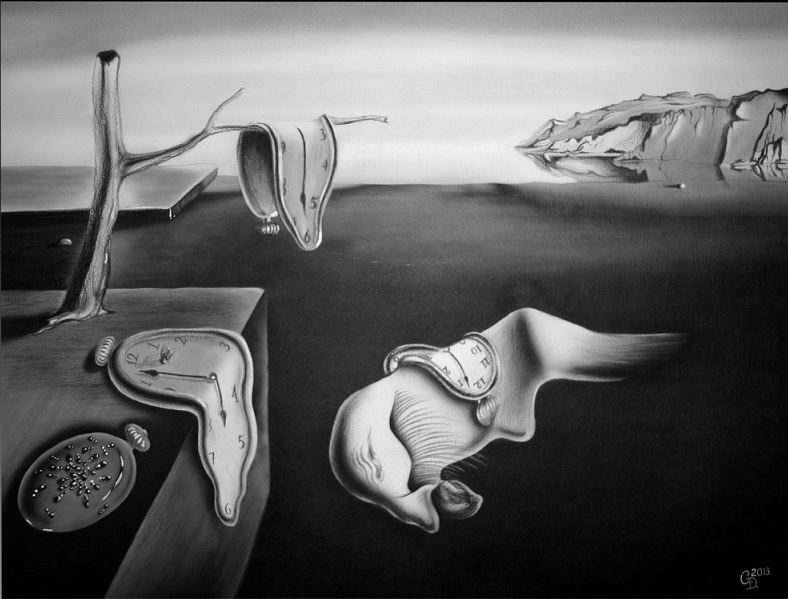

In [14]:
image = Image.open('./dali2.jpg').convert('L')
image

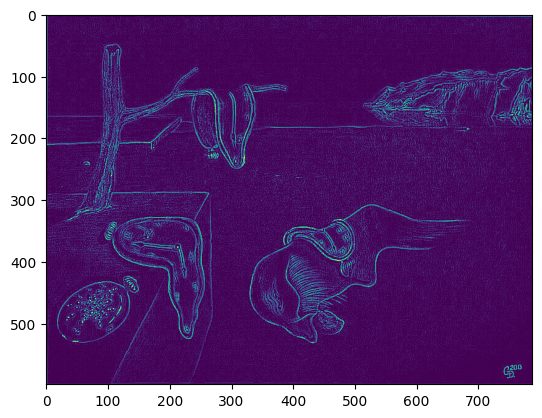

In [17]:
edgy_img = np.asarray(image.filter(ImageFilter.FIND_EDGES))
edgy_img = edgy_img / 255.
plt.imshow(edgy_img)

In [20]:
new_arr = edgy_img.tolist()

In [21]:
for j in range(len(new_arr) - 2, -1, -1):
    for i in range(0, len(new_arr[j])):
        if i == 0:
            new_arr[j][i] += min(new_arr[j + 1][i], new_arr[j + 1][i + 1])
        elif i == len(new_arr[j]) - 1:
            new_arr[j][i] += min(new_arr[j + 1][i - 1], new_arr[j + 1][i])
        else:
            new_arr[j][i] += min(new_arr[j + 1][i - 1], new_arr[j + 1][i], new_arr[j + 1][i + 1])

In [26]:
print(np.array(new_arr))

[[1.66666667 1.30980392 1.29019608 ... 1.23921569 1.23921569 1.23921569]
 [1.65882353 1.74901961 1.2745098  ... 1.22745098 1.22745098 1.24313725]
 [1.56470588 1.54117647 1.04705882 ... 1.47058824 1.22745098 1.40392157]
 ...
 [1.09019608 0.67058824 0.01960784 ... 0.06666667 0.07058824 0.07058824]
 [0.92941176 0.5254902  0.01960784 ... 0.07058824 0.07058824 0.07058824]
 [0.56470588 0.36862745 0.01960784 ... 0.07058824 0.07058824 0.07058824]]


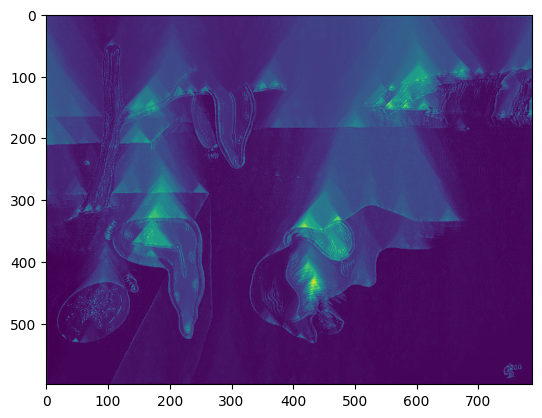

In [22]:
plt.imshow(np.array(new_arr))

In [23]:
shrunk=edgy_img.tolist()
shrink_width=0.8

def find_mindex(min_cell,i):
    
    if min_cell==0:
        minel=min(
            shrunk[i][min_cell],
            shrunk[i][min_cell+1]
        )
        if minel==shrunk[i][min_cell]:
            return min_cell
        elif minel==shrunk[i][min_cell+1]:
            return min_cell+1
    elif min_cell==len(shrunk[i])-1:
        minel=min(
            shrunk[i][min_cell],
            shrunk[i][min_cell-1]
        )
        if minel==shrunk[i][min_cell]:
            return min_cell
        elif minel==shrunk[i][min_cell-1]:
            return min_cell-1
    else:
        minel=min(
            shrunk[i][min_cell],
            shrunk[i][min_cell-1],
            shrunk[i][min_cell+1]
        )
        if minel==shrunk[i][min_cell]:
            return min_cell
        elif minel==shrunk[i][min_cell-1]:
            return min_cell-1
        elif minel==shrunk[i][min_cell+1]:
            return min_cell+1

for k in range(0,int((1-shrink_width)*len(new_arr[0]))):
    min_cell=[l for l,j in enumerate(shrunk[0]) if j==min(shrunk[0])][0]
    for i in range(0,len(shrunk)):
        min_bell=find_mindex(min_cell,i)
        shrunk[i-1].pop(min_cell)
        min_cell=min_bell
    

In [24]:
len(shrunk[0])

631

AxesImage(shape=(599, 631))


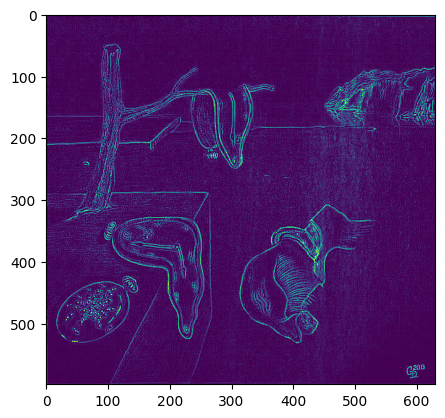

In [25]:
print(plt.imshow(np.array(shrunk)))